In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

year_ago = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
year_ago #2016-8-24

year_data = session.query(measurement).filter(measurement.date < dt.date(2016,8,24))

end_date = dt.datetime(2017, 8, 23)
start_date = dt.datetime(2016, 8, 24)

results = session.query(measurement.prcp, 
                        measurement.date).\
                  filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

precipitation = [{"Date": result[1], "PRCP": result[0]} for result in results]

precip_df = pd.DataFrame(precipitation)

unsorted_prcp_df = precip_df.set_index('Date')

prcp_df = unsorted_prcp_df.sort_values('PRCP')

final_prcp_df = prcp_df.dropna(how= 'any')
final_prcp_df

,PRCP
Date,
2017-04-04,0.00
2017-03-14,0.00
2017-03-18,0.00
2017-03-21,0.00
2017-03-22,0.00
...,...
2016-10-04,3.46
2017-07-22,4.00
2017-02-11,5.04


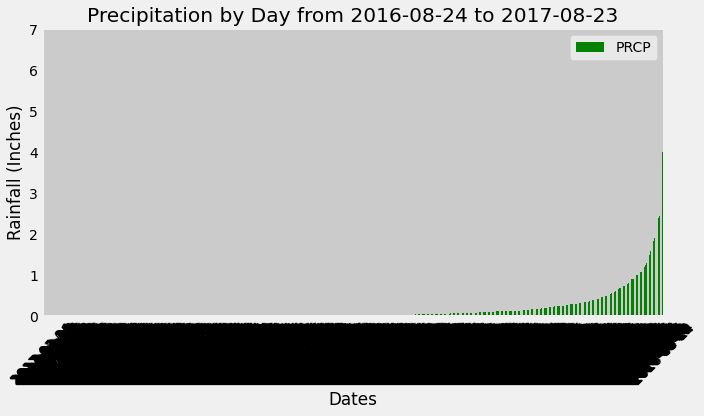

In [82]:
x_values = final_prcp_df.index
y_values = final_prcp_df["PRCP"]

final_prcp_df.plot(kind='bar', rot = 45, alpha = 0.99, color = 'g', figsize = (10, 6), legend = True)
plt.title("Precipitation by Day from 2016-08-24 to 2017-08-23")
plt.ylabel("Rainfall (Inches)")
plt.xlabel("Dates")
plt.tight_layout()
# Dear grader, I am sorry this graph looks so terrible, this is due in only a couple minutes and I desperately need sleep


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = final_prcp_df.describe()
summary_stats


,PRCP
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(measurement.station).count()
print("There are " + str(number_of_stations) + " available stations in the Measurement dataset.")


There are 19550 available stations in the Measurement dataset.


In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, 
                                            func.count(measurement.station),
                                            func.min(measurement.tobs), 
                                            func.max(measurement.tobs), 
                                            func.avg(measurement.tobs)).\
                                    group_by(measurement.station).\
                                    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 2724, 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 2709, 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 2669, 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 2612, 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 2202, 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 1979, 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 1372, 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 511, 58.0, 83.0, 72.72407045009784)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_stats = session.query(measurement.station, 
                                            func.count(measurement.station),
                                            func.min(measurement.tobs), 
                                            func.max(measurement.tobs), 
                                            func.avg(measurement.tobs)).\
                                    group_by(measurement.station).\
                                    order_by(func.count(measurement.station).desc()).first()
most_active_stations_stats

('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months = session.query(measurement.date, measurement.station, measurement.tobs).\
filter(measurement.date >= '2016-08-24').\
filter(measurement.station == 'USC00519281').\
    order_by(measurement.date.desc()).all()
    
twelve_months

[('2017-08-18', 'USC00519281', 79.0),
 ('2017-08-17', 'USC00519281', 76.0),
 ('2017-08-16', 'USC00519281', 76.0),
 ('2017-08-15', 'USC00519281', 77.0),
 ('2017-08-14', 'USC00519281', 77.0),
 ('2017-08-13', 'USC00519281', 77.0),
 ('2017-08-06', 'USC00519281', 83.0),
 ('2017-08-05', 'USC00519281', 82.0),
 ('2017-08-04', 'USC00519281', 77.0),
 ('2017-07-31', 'USC00519281', 76.0),
 ('2017-07-30', 'USC00519281', 81.0),
 ('2017-07-29', 'USC00519281', 82.0),
 ('2017-07-28', 'USC00519281', 81.0),
 ('2017-07-27', 'USC00519281', 76.0),
 ('2017-07-26', 'USC00519281', 75.0),
 ('2017-07-25', 'USC00519281', 77.0),
 ('2017-07-24', 'USC00519281', 75.0),
 ('2017-07-23', 'USC00519281', 82.0),
 ('2017-07-22', 'USC00519281', 77.0),
 ('2017-07-21', 'USC00519281', 77.0),
 ('2017-07-20', 'USC00519281', 77.0),
 ('2017-07-19', 'USC00519281', 76.0),
 ('2017-07-18', 'USC00519281', 76.0),
 ('2017-07-17', 'USC00519281', 76.0),
 ('2017-07-16', 'USC00519281', 80.0),
 ('2017-07-15', 'USC00519281', 80.0),
 ('2017-07-1

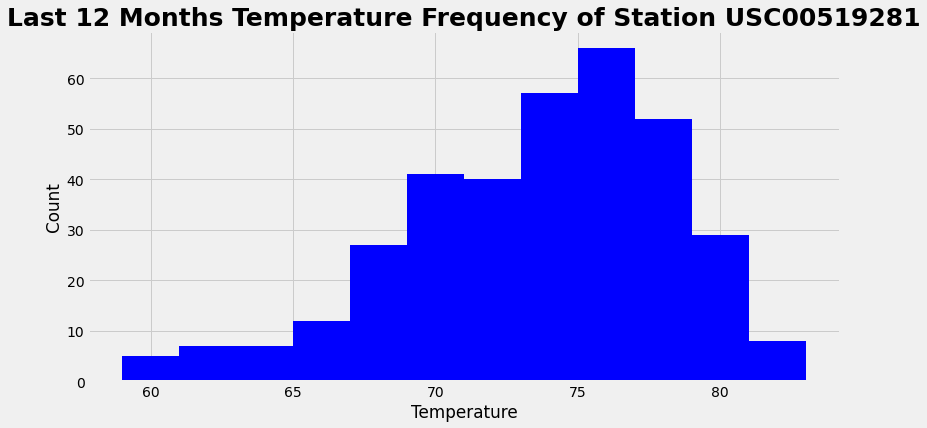

In [77]:
twelve_months_df = pd.DataFrame(twelve_months)

twelve_months_df.plot.hist(bins=12, figsize = (12, 6), color = 'b', legend = False)
plt.title("Last 12 Months Temperature Frequency of Station USC00519281", fontsize = 25, fontweight = 'bold')
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

# Close session

In [78]:
# Close Session
session.close()